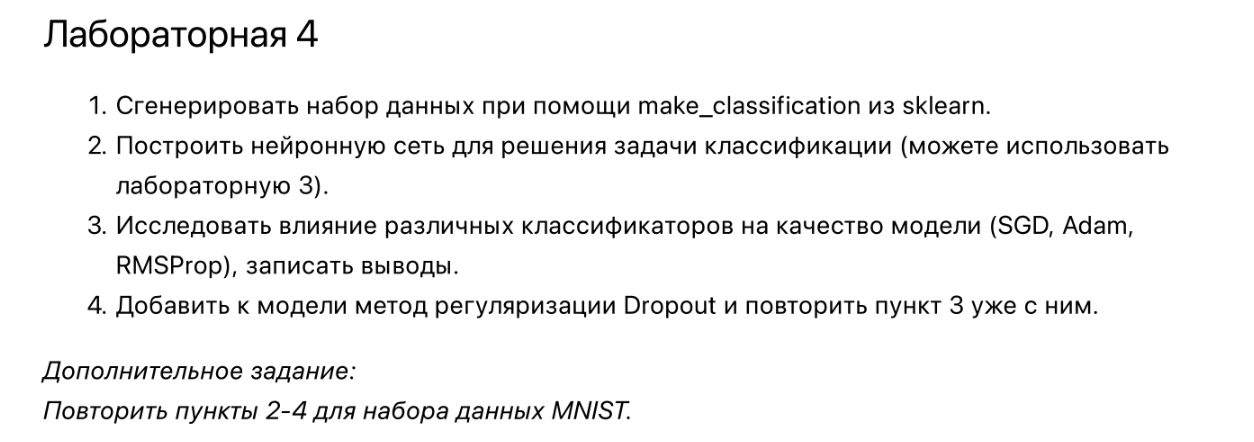

In [22]:
from sklearn.datasets import make_classification, make_regression
import matplotlib.pyplot as plt
import torch
from sklearn.model_selection import train_test_split
import torch.nn.functional as F
from sklearn.metrics import accuracy_score
from torch.optim import Adam, RMSprop, SGD
from torch.nn import Sequential, Linear, Dropout, ReLU

In [23]:
N_FEATURES = 2
FIRST_LAYER_SIZE = 80
SECOND_LAYER_SIZE = 240
THIRD_LAYER_SIZE = 80
OUTPUT_SIZE = 1
TEST_SIZE = 0.2
EPOCH = 1000
BATCH_SIZE = 64
LR = 1e-2
SEED = 42

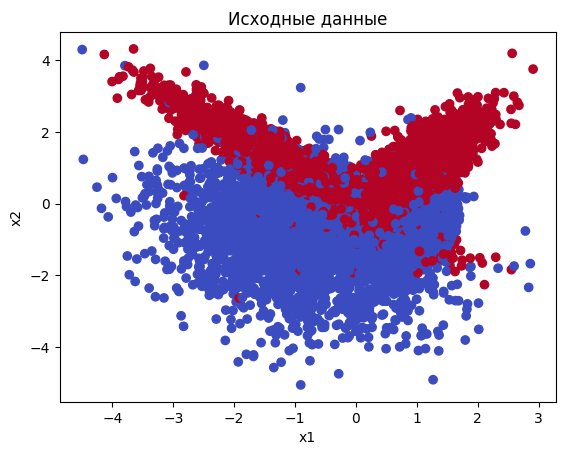

In [24]:
X, y = make_classification(
    n_samples=10000,
    n_features=N_FEATURES,
    n_informative=2,
    n_redundant=0,
    n_repeated=0,
    n_classes=2,
    random_state=SEED,
)
X = torch.tensor(X, dtype=torch.float32)
y = torch.tensor(y, dtype=torch.float32).reshape(-1, 1)

plt.scatter(X[:, 0], X[:, 1], c=y, cmap="coolwarm")
plt.title("Исходные данные")
plt.xlabel("x1")
plt.ylabel("x2")
plt.show()

In [25]:
model = Sequential(
    Linear(N_FEATURES, FIRST_LAYER_SIZE),
    ReLU(),
    Linear(FIRST_LAYER_SIZE, SECOND_LAYER_SIZE),
    ReLU(),
    Linear(SECOND_LAYER_SIZE, THIRD_LAYER_SIZE),
    ReLU(),
    Linear(THIRD_LAYER_SIZE, OUTPUT_SIZE),
)

In [26]:
def pipeline(model, X_train, y_train, X_test, y_test, opt):
    losses = []

    optimizer = opt(model.parameters())

    for _ in range(EPOCH):
        ix = torch.randint(0, X_train.shape[0], (BATCH_SIZE,))

        optimizer.zero_grad()

        xi, yi = X_train[ix], y_train[ix]
        xi = model(xi)

        probs = F.sigmoid(xi)

        loss = F.binary_cross_entropy(probs, yi)
        losses.append(loss.detach())

        loss.backward()
        optimizer.step()

    plt.plot(torch.tensor(losses))
    plt.show()

    acc = 0
    with torch.no_grad():
        xi = X_test
        xi = model(xi)

        predictions = (xi > 0.5).float()
        acc = accuracy_score(y_test.numpy(), predictions.numpy())

    print(f"acc: {acc}")

In [27]:
X_train, X_test, y_train, y_test = train_test_split(
    X,
    y,
    test_size=TEST_SIZE,
    random_state=SEED,
)

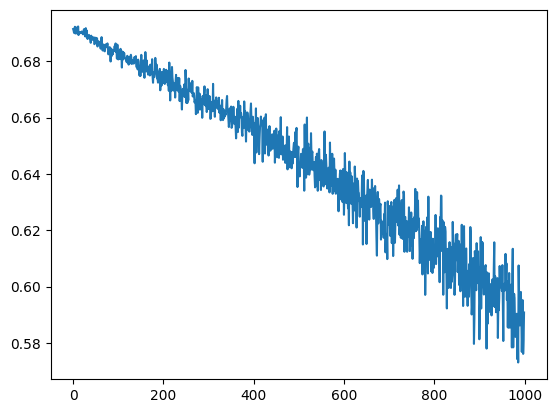

acc: 0.507


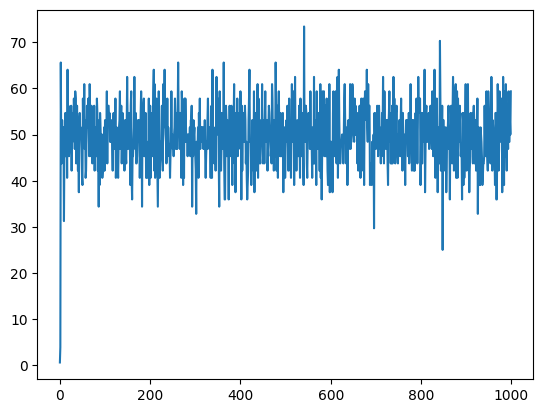

acc: 0.4965


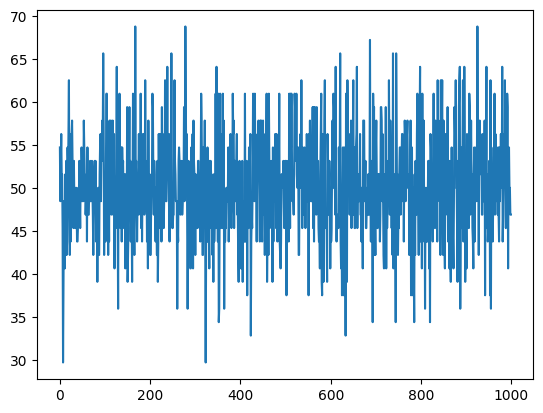

acc: 0.4965


In [28]:
for clf in [SGD, RMSprop, Adam]:
    pipeline(
        model,
        X_train,
        y_train,
        X_test,
        y_test,
        clf,
    )

Из-за простоты модели заметной разницы между этими алгоритмами нет, однако в среднем RMSprop и Adam обеспечивают более быструю и точную сходимость по сравнению с SGD.

In [29]:
model = Sequential(
    Linear(N_FEATURES, FIRST_LAYER_SIZE),
    ReLU(),
    Dropout(p=0.5),
    Linear(FIRST_LAYER_SIZE, SECOND_LAYER_SIZE),
    ReLU(),
    Dropout(p=0.5),
    Linear(SECOND_LAYER_SIZE, THIRD_LAYER_SIZE),
    ReLU(),
    Dropout(p=0.5),
    Linear(THIRD_LAYER_SIZE, OUTPUT_SIZE),
)

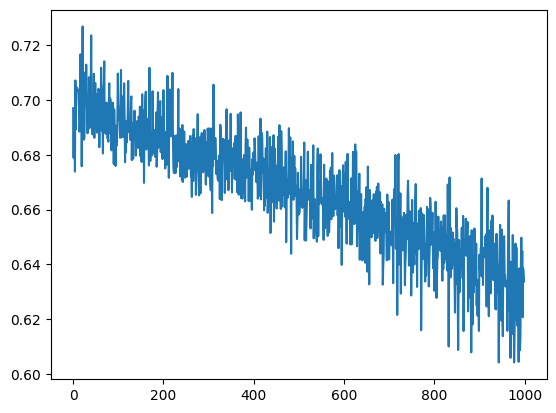

acc: 0.5145


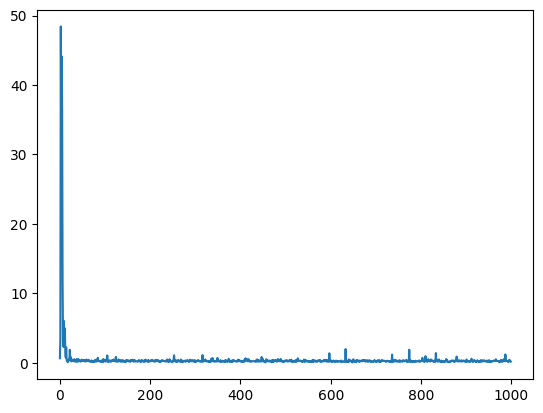

acc: 0.9315


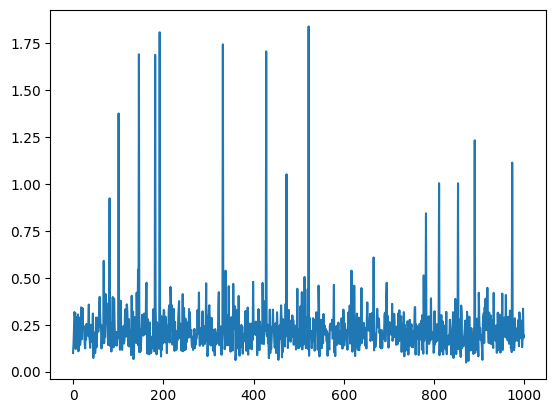

acc: 0.9315


In [30]:
for clf in [SGD, RMSprop, Adam]:
    pipeline(
        model,
        X_train,
        y_train,
        X_test,
        y_test,
        clf,
    )

Стало меньше шума для RMSprop, Adam, но на SGD практически не повлияло